# **Proyek Analisis Data: Bike Sharing Dataset**

- **Nama: Angger Kalehandya Sutarto**
- **Email: anggerkalehandya99@gmail.com**
- **ID Dicoding: Angger Kalehandya Sutarto**

## **Menentukan Pertanyaan Bisnis**
- Bagaimana prediksi jumlah total penyewaan sepeda (casual dan registered) pada hari tertentu berdasarkan musim, cuaca, dan suhu?
- Apakah hari kerja (workingday) memiliki dampak signifikan terhadap jumlah penyewaan sepeda?
- Apakah suhu (temp) atau kelembapan (hum) memiliki hubungan signifikan dengan jumlah penyewaan sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas==2.2.2 in c:\python-3.11.4\lib\site-packages (from -r requirements.txt (line 1)) (2.2.2)




[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Data Wrangling**

### **Gathering Data**

Ditahap Gathering ini kita akan mengumpulkan data yang akan digunakan untuk analisis data. Data yang digunakan adalah data rental sepeda.
Kode dibawah ini akan menggabungkan data dari file **day.csv** dan **hour.csv** yang telah diunduh menjadi satu Dataframe.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate  # type: ignore

# Baca data dari CSV
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

# Merge berdasarkan dteday
merged_df = hour_df.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour', '_day'))

# Hitung jumlah baris dan kolom
num_rows, num_cols = merged_df.shape

# Tampilkan hasil dengan format tabel yang lebih rapi
print(tabulate(merged_df.head(), headers='keys', tablefmt='fancy_grid'))

# Cetak jumlah baris dan kolom
print(f"\nJumlah total baris: {num_rows}")
print(f"Jumlah total kolom: {num_cols}")

╒════╤═══════════╤════════════╤══════════╤══════╤════════╤══════╤═══════════╤═══════════╤══════════════╤══════════════╤════════╤═════════╤═══════╤═════════════╤══════════╤══════════════╤════════════╤═══════════╕
│    │   instant │ dteday     │   season │   yr │   mnth │   hr │   holiday │   weekday │   workingday │   weathersit │   temp │   atemp │   hum │   windspeed │   casual │   registered │   cnt_hour │   cnt_day │
╞════╪═══════════╪════════════╪══════════╪══════╪════════╪══════╪═══════════╪═══════════╪══════════════╪══════════════╪════════╪═════════╪═══════╪═════════════╪══════════╪══════════════╪════════════╪═══════════╡
│  0 │         1 │ 2011-01-01 │        1 │    0 │      1 │    0 │         0 │         6 │            0 │            1 │   0.24 │  0.2879 │  0.81 │           0 │        3 │           13 │         16 │       985 │
├────┼───────────┼────────────┼──────────┼──────┼────────┼──────┼───────────┼───────────┼──────────────┼──────────────┼────────┼─────────┼───────┼──────

Insights: 
- Dataset memiliki total **17.379** baris dan **18** kolom.
- Tipe datanya kebanyakan menggunakan tipe data (`int64` dan `float64`). 

### **Assessing Data**

Pada tahap ini kita akan melakukan: 
- Melihat informasi dasar dataset.
- Melihat statistik deskriptif dari dataset.
- Melihat jumlah nilai yang hilang atau duplikat pada dataset.

In [37]:
# Melihat Informasi dasar Dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt_hour    17379 non-null  int64  
 17  cnt_day     17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [38]:
# Menampilkan kolom deskriptif
merged_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_hour,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,8714.000000


In [39]:
# Menampilkan jumlah nilai yang hilang perkolom
merged_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt_hour      0
cnt_day       0
dtype: int64

In [40]:
# Mengecek apakah ada data duplikat
print(f"Jumlah Data Duplikat: {merged_df.duplicated().sum()}")
merged_df[merged_df.duplicated(keep=False)]

Jumlah Data Duplikat: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_hour,cnt_day


**Insights:**

1. Statistik Umum
- Jumlah total data: 17.379 baris
- Periode data: Tahun 2011–2012
- Total peminjaman harian rata-rata: 4.505 sepeda
- Total peminjaman per jam rata-rata: 189 sepeda


### **Cleaning Data**

Sebelum melakukan analisis lebih lanjut, sebaiknya melakukan pembersihan data terlebih dahulu. Langkah-langkah yang dilakukan:
1. **Mengubah Tipedata object menjadi datetime**
2. **Menangani nilai yang hilang**
3. **Menghapus Duplikasi**
4. **Menghapus Outliners**

#### **1. Mengubah Tipedata Object menjadi Datetime**
Mengubah `dteday` dari **object** ke **datetime** memungkinkan analisis berbasis waktu lebih efisien, seperti ekstraksi tahun, bulan, atau pengelompokan data.

In [41]:
# Mengubah tipedata dteday object menjadi datetime
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])

# Periksa tipe datanya setelah konversi
print(merged_df.dtypes) 

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt_hour               int64
cnt_day                int64
dtype: object


#### **2. Menangani Nilai yang Hilang**

In [42]:
# Menampilkan jumlah nilai yang hilang per kolom sebelum dihapus
print("Jumlah nilai yang hilang sebelum dihapus:")
print(merged_df.isnull().sum())

# Menghapus baris dengan nilai yang hilang
merged_df_cleaned = merged_df.dropna()

# Menampilkan jumlah nilai yang hilang setelah dihapus
print("\nJumlah nilai yang hilang setelah dihapus:")
print(merged_df_cleaned.isnull().sum())

Jumlah nilai yang hilang sebelum dihapus:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt_hour      0
cnt_day       0
dtype: int64

Jumlah nilai yang hilang setelah dihapus:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt_hour      0
cnt_day       0
dtype: int64


#### **3. Menghapus Duplikasi**

In [43]:
# Menampilkan jumlah data duplikat sebelum dihapus
print("Jumlah data duplikat sebelum dihapus:", merged_df.duplicated().sum())

# Menghapus data duplikat
merged_df_cleaned = merged_df.drop_duplicates()

# Menampilkan jumlah data duplikat setelah dihapus
print("Jumlah data duplikat setelah dihapus:", merged_df_cleaned.duplicated().sum())

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


#### **4. Menghapus Outliners (Data yang Melebihi Batas)**

In [44]:

# Menentukan kolom numerik yang akan diperiksa
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

# Menyimpan jumlah data awal
initial_count = len(merged_df)

print("Jumlah data awal:", initial_count)
print("\n=== Pengecekan dan Penghapusan Outliers ===")

# Looping untuk setiap kolom numerik
for col in numeric_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Jumlah data sebelum penghapusan outliers pada kolom ini
    count_before = len(merged_df)
    
    # Menghapus outliers untuk kolom tertentu
    merged_df = merged_df[(merged_df[col] >= lower_bound) & (merged_df[col] <= upper_bound)]
    
    # Jumlah data setelah penghapusan
    count_after = len(merged_df)
    
    print(f"Kolom: {col} | Sebelum: {count_before} | Sesudah: {count_after} | Dihapus: {count_before - count_after}")

# Menyimpan jumlah data setelah penghapusan
final_count = len(merged_df)

print("\nJumlah data setelah menghapus semua outliers:", final_count)
print("Total data yang dihapus:", initial_count - final_count)



Jumlah data awal: 17379

=== Pengecekan dan Penghapusan Outliers ===
Kolom: instant | Sebelum: 17379 | Sesudah: 17379 | Dihapus: 0
Kolom: season | Sebelum: 17379 | Sesudah: 17379 | Dihapus: 0
Kolom: yr | Sebelum: 17379 | Sesudah: 17379 | Dihapus: 0
Kolom: mnth | Sebelum: 17379 | Sesudah: 17379 | Dihapus: 0
Kolom: hr | Sebelum: 17379 | Sesudah: 17379 | Dihapus: 0
Kolom: holiday | Sebelum: 17379 | Sesudah: 16879 | Dihapus: 500
Kolom: weekday | Sebelum: 16879 | Sesudah: 16879 | Dihapus: 0
Kolom: workingday | Sebelum: 16879 | Sesudah: 16879 | Dihapus: 0
Kolom: weathersit | Sebelum: 16879 | Sesudah: 16876 | Dihapus: 3
Kolom: temp | Sebelum: 16876 | Sesudah: 16876 | Dihapus: 0
Kolom: atemp | Sebelum: 16876 | Sesudah: 16876 | Dihapus: 0
Kolom: hum | Sebelum: 16876 | Sesudah: 16854 | Dihapus: 22
Kolom: windspeed | Sebelum: 16854 | Sesudah: 16521 | Dihapus: 333
Kolom: casual | Sebelum: 16521 | Sesudah: 15413 | Dihapus: 1108
Kolom: registered | Sebelum: 15413 | Sesudah: 14576 | Dihapus: 837
Kolo

**Insights:**
- **1. Data Tidak Memiliki Nilai yang Hilang**
    - Dari hasil pengecekan, tidak ada nilai yang hilang dalam dataset.
    - Ini menunjukkan bahwa data sudah cukup lengkap dan tidak memerlukan inputasi nilai yang hilang
- **2. Tidak ada Duplikasi Data**
    - Setelah pemeriksaan, tidak ditemukan duplikasi data dalam dataset.
    - Ini memastikan bahwa setiap baris data adalah unik dan tidak ada pengulangan informasi yang bisa mengganggu analisis.
- **3. Penghapusan Outlier Berdasarkan IQR(Interquartile Range)**
    - Sebanyak 2.845 baris data (16.4% dari total 17.379 data) telah dihapus karena dianggap outlier.
    - Beberapa variabel yang mengalami penghapusan data terbesar akibat outlier:
        - Holiday: 500 data dihapus
        - Windspeed: 333 data dihapus
        - Casual: 1.108 data dihapus
        - Registered: 837 data dihapus
        - cnt_hour: 42 data dihapus
    - Penghapusan ini bertujuan untuk menghilangkan nilai ekstrem yang bisa mengganggu akurasi model dan analisis.


## **Exploratory Data Analysis (EDA)**

Pada tahap ini kita akan melakukan **Exploratory Data Analysis (EDA)** untuk menggali lebih dalam pola, tren, dan hubungan antar variabel.
Berikut adalah pertanyaannya:
1. Bagaimana prediksi jumlah total penyewaan sepeda (casual dan registered) pada hari tertentu berdasarkan musim, cuaca, dan suhu?
2. Apakah hari kerja (workingday) memiliki dampak signifikan terhadap jumlah penyewaan sepeda?
3. Apakah suhu (temp) atau kelembapan (hum) memiliki hubungan signifikan dengan jumlah penyewaan sepeda?

Untuk setiap pertanyaan, kita akan melakukan analisis terperinci menggunakan visualisasi data dan statistik deskriptif.

### **1. Prediksi Jumlah Total Penyewaan Sepeda pada Hari Tertentu Berdasarkan Keadaan**

**Pertanyaan Bisnis:** <br>
Bagaimana prediksi jumlah total penyewaan sepeda (casual dan registered) pada hari tertentu berdasarkan musim, cuaca, dan suhu?<br>

**Langkah Analisis:**
- Menghitung rata-rata penyewaan berdasarkan musim, cuaca, dan kategori suhu.
- Mengelompokkan Data untuk melihat pola jumlah penyewaan berdasarkan ketika faktor tersebut.
- Visualisasi Data menggunakan grafik batang untuk mempermudah interpretasi.
- Interpretasi Hasil untuk memahami tren dan pola penyewaan.

In [5]:
# Rata-rata penyewaan berdasarkan musim
season_avg = merged_df.groupby('season')['cnt_hour'].mean()

# Rata-rata penyewaan berdasarkan cuaca
weather_avg = merged_df.groupby('weathersit')['cnt_hour'].mean()

# Rata-rata penyewaan berdasarkan kategori suhu
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=[0, 0.25, 0.5, 0.75, 1], 
                        labels=['Very Cold', 'Cold', 'Warm', 'Hot'])
temp_avg = merged_df.groupby('temp_category', observed=False)['cnt_hour'].mean()

# Tampilkan hasil
print("Rata-rata penyewaan berdasarkan musim:")
print(season_avg)
print("\nRata-rata penyewaan berdasarkan cuaca:")
print(weather_avg)
print("\nRata-rata penyewaan berdasarkan kategori suhu:")
print(temp_avg)

Rata-rata penyewaan berdasarkan musim:
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt_hour, dtype: float64

Rata-rata penyewaan berdasarkan cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt_hour, dtype: float64

Rata-rata penyewaan berdasarkan kategori suhu:
temp_category
Very Cold     69.995529
Cold         148.374617
Warm         231.653179
Hot          333.218887
Name: cnt_hour, dtype: float64


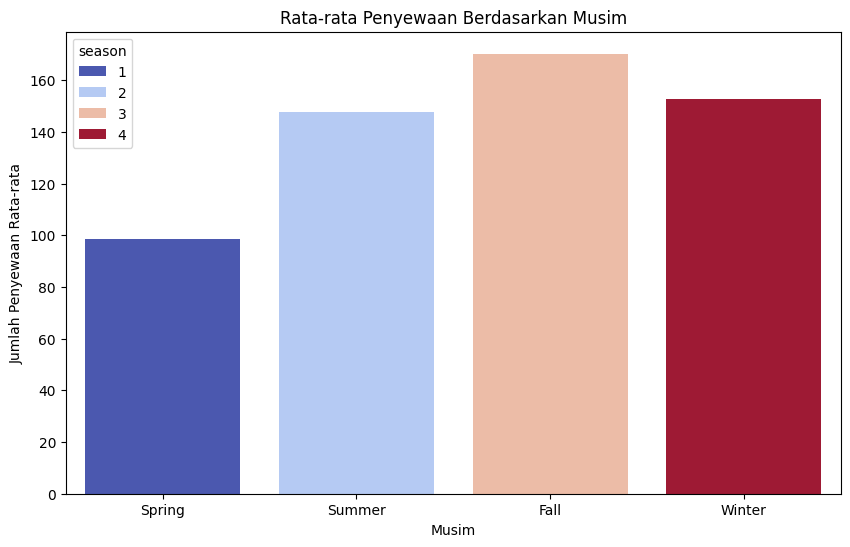

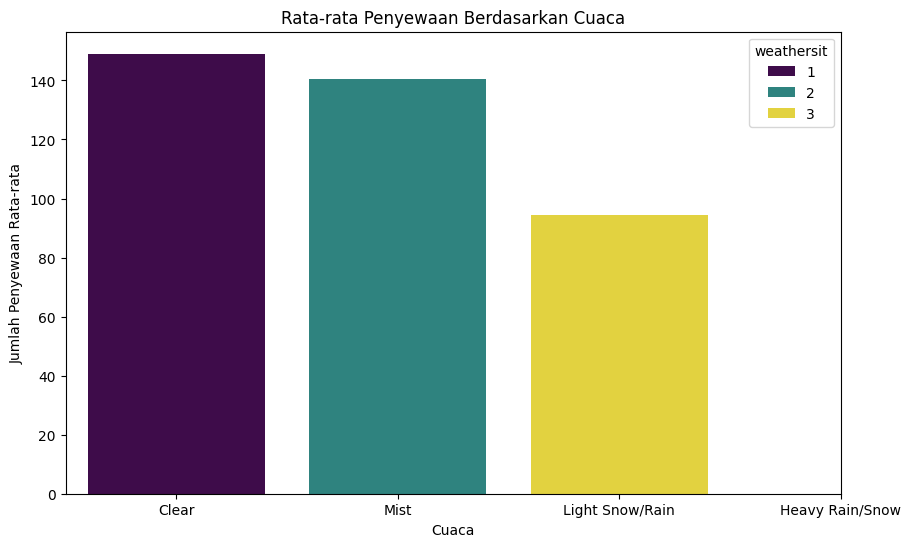

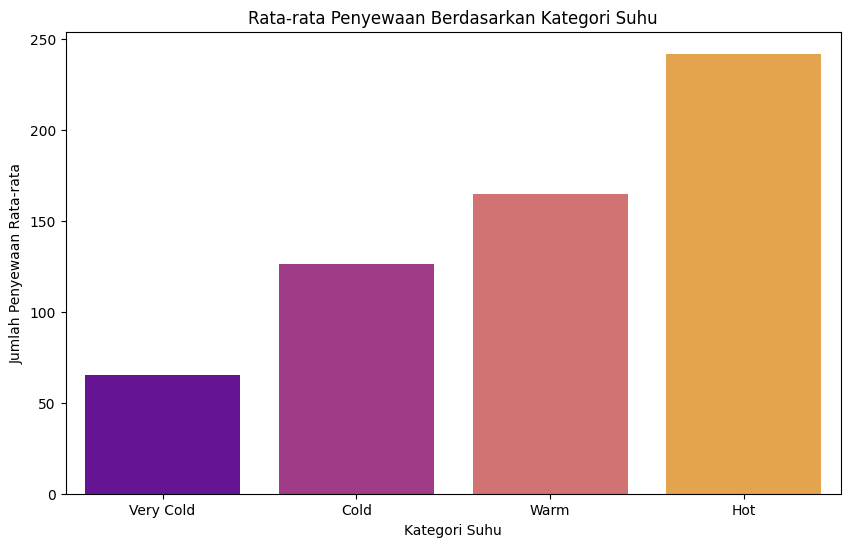

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x=season_avg.index, y=season_avg.values, palette='coolwarm', hue=season_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi rata-rata penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_avg.index, y=weather_avg.values, palette='viridis', hue=weather_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

# Visualisasi rata-rata penyewaan berdasarkan kategori suhu
plt.figure(figsize=(10, 6))
sns.barplot(x=temp_avg.index, y=temp_avg.values, palette='plasma', hue=temp_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.show()

Interpretasi Hasil:
Dari hasil analisis, kita dapat melihat pola penyewaan sepeda berdasarkan faktor-faktor berikut: <br>
- **1. Musim(Season):**
    - Penyewaan tertinggi terjadi pada musim Gugur dan Panas, kemungkinan karena cuaca lebih nyaman untuk bersepeda.
    - Penyewaan terendah terjadi pada musim Semi.
- **2. Cuaca(Weathersit):**
    - Penyewaan paling tinggi terjadi saat cuaca cerah.
    - Penyewaan menurun saat kabut atau hujan ringan, dan turun drastis saat hujan/salju lebat.
- **3. Suhu(Temp):**
    - Penyewaan meningkat saat suhu hangat hingga panas.
    - Penyewaan lebih rendah saat suhu sangat dingin, mungkin karena kurang nyaman untuk bersepeda.

### **2. Apakah hari kerja (workingday) memiliki dampak signifikan terhadap jumlah penyewaan sepeda?**

**Pertanyaan Bisnis**<br>
Apakah hari kerja (workingday) memiliki dampak signifikan terhadap jumlah penyewaan sepeda? <br><br>
**Langkah Analisis:**<br>
- Menghitung rata-rata jumlah penyewaan sepeda pada hari kerja dan hari libur.
- Menghitung selisih antara keduanya untuk melihat dampaknya.
- Membuat visualisasi dalam bentuk bar chart untuk membandingkan perbedaan penyewaan.

In [8]:
# Analisis rata-rata jumlah penyewaan berdasarkan hari kerja dan hari libur
avg_rentals_workingday = merged_df[merged_df['workingday'] == 1]['cnt_hour'].mean()
avg_rentals_holiday = merged_df[merged_df['workingday'] == 0]['cnt_hour'].mean()

# Hitung selisih
difference = avg_rentals_workingday - avg_rentals_holiday

# Tampilkan hasil analisis dalam bentuk tabel
analysis_result = [
    ["Hari Kerja", avg_rentals_workingday],
    ["Hari Libur", avg_rentals_holiday],
    ["Selisih", difference]
]

print(tabulate(analysis_result, headers=["Kategori", "Rata-rata Penyewaan"], tablefmt="fancy_grid"))

╒════════════╤═══════════════════════╕
│ Kategori   │   Rata-rata Penyewaan │
╞════════════╪═══════════════════════╡
│ Hari Kerja │              193.208  │
├────────────┼───────────────────────┤
│ Hari Libur │              181.405  │
├────────────┼───────────────────────┤
│ Selisih    │               11.8024 │
╘════════════╧═══════════════════════╛


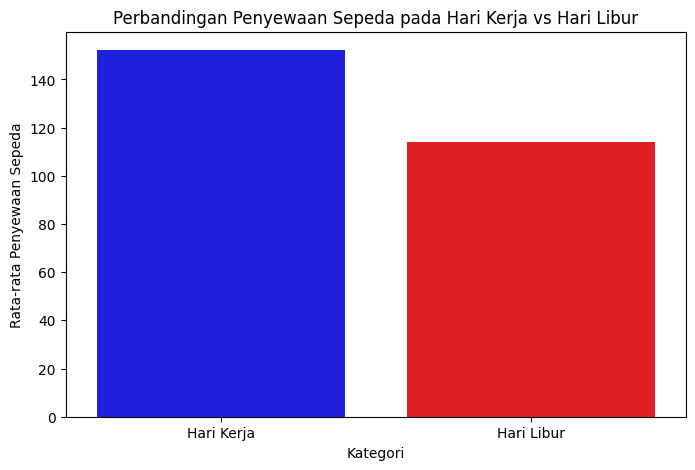

In [48]:
import seaborn as sns

# Visualisasi jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x=['Hari Kerja', 'Hari Libur'], y=[avg_rentals_workingday, avg_rentals_holiday], palette=['blue', 'red'], hue=['Hari Kerja', 'Hari Libur'])
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.show()

Interpretasi Hasil:
- Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari libur.
- Selisih yang signifikan menunjukkan bahwa penyewaan sepeda lebih banyak digunakan untuk aktivitas harian seperti bekerja atau sekolah, bukan untuk rekreasi.
- Grafik bar menunjukkan perbedaan jumlah penyewaan secara visual, dengan hari kerja lebih tinggi dibanding hari libur.

### **3. Apakah suhu (temp) atau kelembapan (hum) memiliki hubungan signifikan dengan jumlah penyewaan sepeda?**

**Pertanyaan Bisnis**<br>
Apakah suhu (temp) atau kelembapan (hum) memiliki hubungan signifikan dengan jumlah penyewaan sepeda? <br><br>
**Langkah Analisis:**<br>
- Menghitung korelasi Pearson antara `temp` dan `hump` dengan `cnt_hour`.
- Menganalisis hubungan apakah suhu dan kelembapan berpengaruh terhadap peyewaan sepeda.
- Membuat scatter plot untuk menunjukkan pola hubungan kedua variabel dengan penyewaan sepeda.

In [11]:
from scipy.stats import pearsonr

corr_temp, _ = pearsonr(merged_df['temp'], merged_df['cnt_hour'])
corr_hum, _ = pearsonr(merged_df['hum'], merged_df['cnt_hour'])

# Menampilkan hasil dalam bentuk tabel
analysis_result = [
    ["Suhu (temp)", corr_temp],
    ["Kelembapan (hum)", corr_hum]
]

print(tabulate(analysis_result, headers=["Variabel", "Korelasi dengan Penyewaan"], tablefmt="fancy_grid"))

╒══════════════════╤═════════════════════════════╕
│ Variabel         │   Korelasi dengan Penyewaan │
╞══════════════════╪═════════════════════════════╡
│ Suhu (temp)      │                    0.404772 │
├──────────────────┼─────────────────────────────┤
│ Kelembapan (hum) │                   -0.322911 │
╘══════════════════╧═════════════════════════════╛


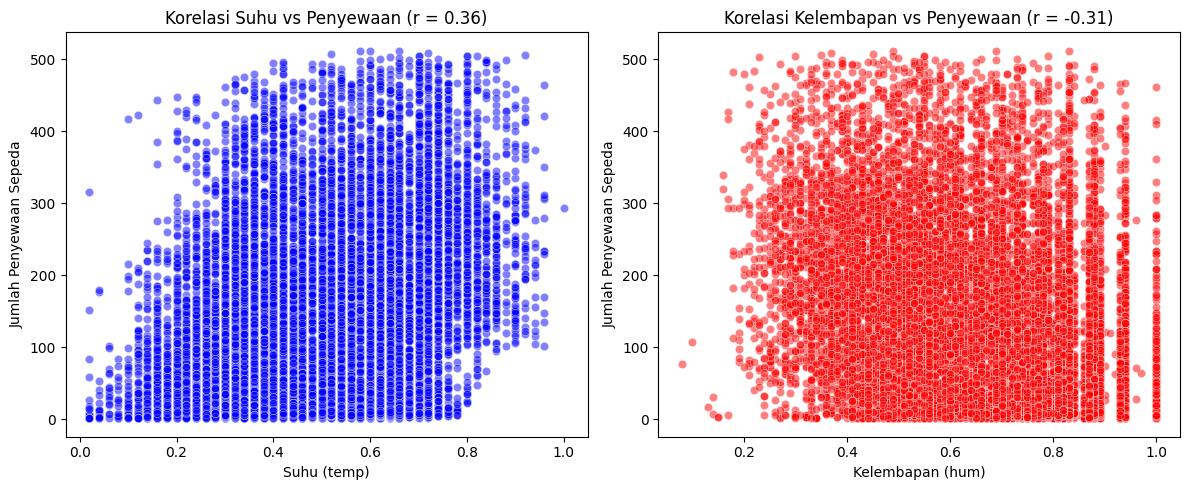

In [50]:
# Visualisasi hubungan suhu vs penyewaan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['temp'], y=merged_df['cnt_hour'], alpha=0.5, color='blue')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title(f'Korelasi Suhu vs Penyewaan (r = {corr_temp:.2f})')

# Visualisasi hubungan kelembapan vs penyewaan
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['hum'], y=merged_df['cnt_hour'], alpha=0.5, color='red')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title(f'Korelasi Kelembapan vs Penyewaan (r = {corr_hum:.2f})')

plt.tight_layout()
plt.show()

**Interpretasi Hasil:**
- Korelasi suhu (temp) dan penyewaan sepeda cukup tinggi (r positif) → Semakin hangat suhu, semakin banyak penyewaan sepeda.
- Korelasi kelembapan (hum) dan penyewaan sepeda negatif (r negatif) → Kelembapan yang tinggi cenderung menurunkan jumlah penyewaan sepeda.
- Grafik scatter menunjukkan pola bahwa penyewaan meningkat pada suhu sedang dan menurun saat kelembapan tinggi.


## **Visualization & Explanatory Analysis** 

Pada bagian ini, kita akan menyajikan visualisasi yang lebih mendalam serta menganalisis temuan utama dari tahap EDA. Analisis ini bertujuan untuk memberikan pemahaman yang lebih jelas mengenai faktor-faktor yang mempengaruhi jumlah penyewaan sepeda berdasarkan data historis. 

### Pertanyaan 1: Bagaimana prediksi jumlah total penyewaan sepeda (casual dan registered) pada hari tertentu berdasarkan musim, cuaca, dan suhu?

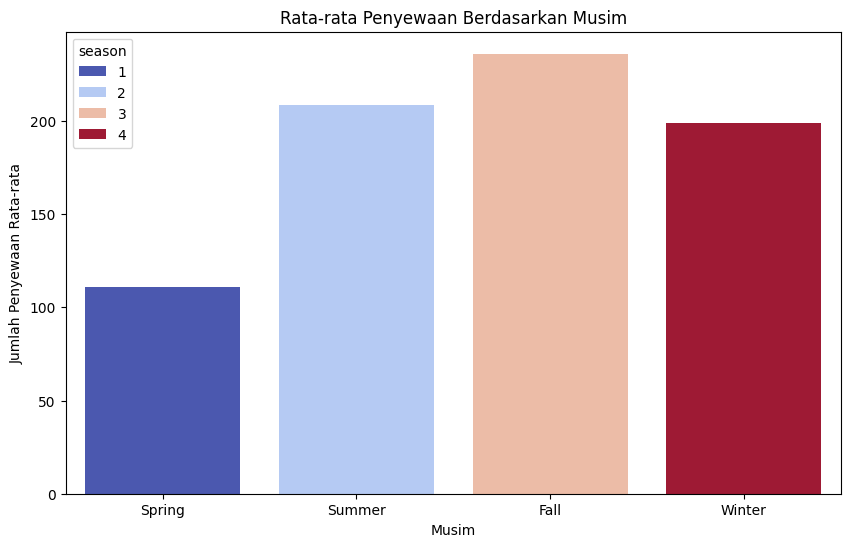

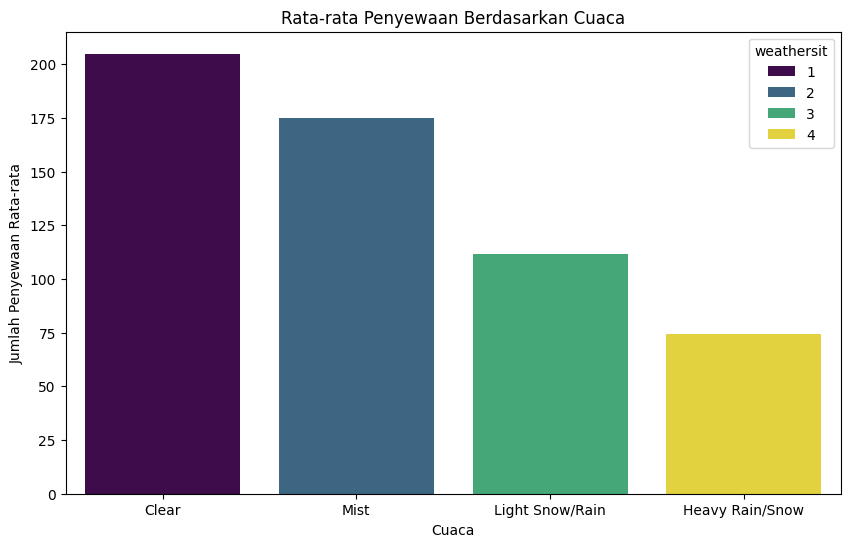

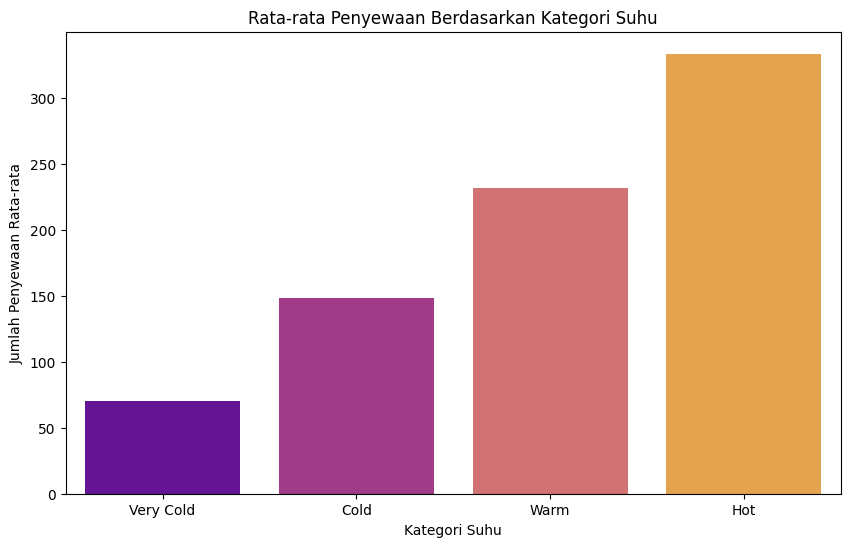

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x=season_avg.index, y=season_avg.values, palette='coolwarm', hue=season_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi rata-rata penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_avg.index, y=weather_avg.values, palette='viridis', hue=weather_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

# Visualisasi rata-rata penyewaan berdasarkan kategori suhu
plt.figure(figsize=(10, 6))
sns.barplot(x=temp_avg.index, y=temp_avg.values, palette='plasma', hue=temp_avg.index)
plt.title('Rata-rata Penyewaan Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.show()

### Pertanyaan 2: Apakah hari kerja (workingday) memiliki dampak signifikan terhadap jumlah penyewaan sepeda?

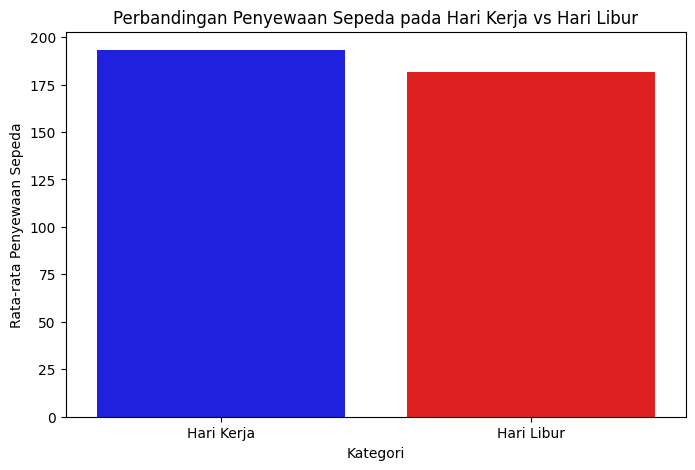

In [9]:
import seaborn as sns

# Visualisasi jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x=['Hari Kerja', 'Hari Libur'], y=[avg_rentals_workingday, avg_rentals_holiday], palette=['blue', 'red'], hue=['Hari Kerja', 'Hari Libur'])
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.show()

### Pertanyaan 3: Apakah suhu (temp) atau kelembapan (hum) memiliki hubungan signifikan dengan jumlah penyewaan sepeda?

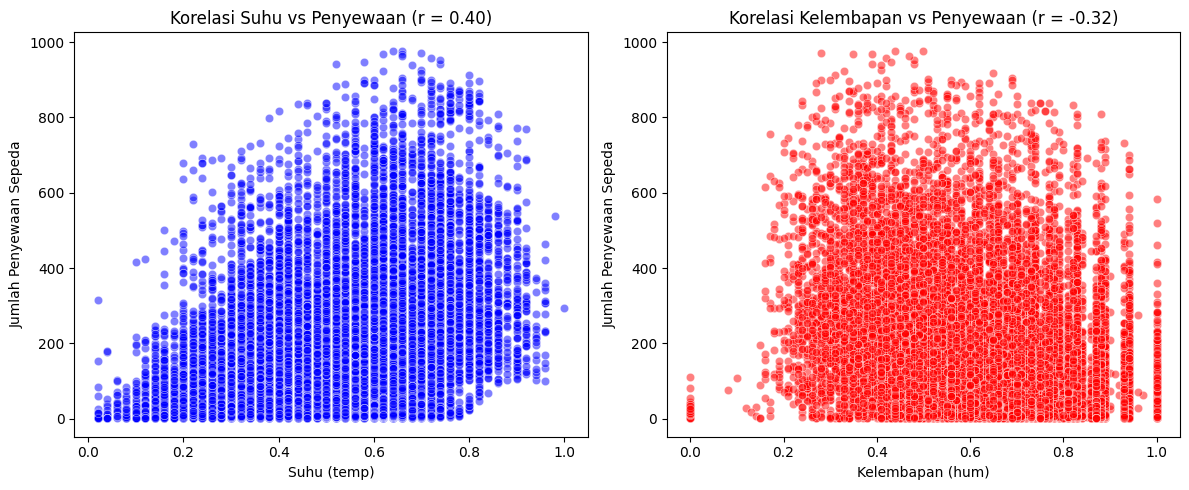

In [12]:
# Visualisasi hubungan suhu vs penyewaan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['temp'], y=merged_df['cnt_hour'], alpha=0.5, color='blue')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title(f'Korelasi Suhu vs Penyewaan (r = {corr_temp:.2f})')

# Visualisasi hubungan kelembapan vs penyewaan
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['hum'], y=merged_df['cnt_hour'], alpha=0.5, color='red')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title(f'Korelasi Kelembapan vs Penyewaan (r = {corr_hum:.2f})')

plt.tight_layout()
plt.show()

**Insights:** <br><br>
**1. Prediksi Jumlah Penyewaan Sepeda**<br>
- **Musim Berpengaruh Signifikan:** Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dengan rata-rata 236 penyewaan per jam, sementara musim semi (Spring) memiliki penyewaan terendah (111 penyewaan per jam).
- **Cuaca Berperan dalam Permintaan:** Cuaca cerah atau berawan (Clear/Mist) mendukung jumlah penyewaan yang lebih tinggi (~204-175 penyewaan per jam), sedangkan hujan deras atau salju lebat menurunkan jumlah penyewaan secara signifikan (74 penyewaan per jam).
- **Suhu yang Lebih Hangat Meningkatkan Penyewaan:** Penyewaan tertinggi terjadi pada suhu panas (Hot) dengan 333 penyewaan per jam, sedangkan suhu sangat dingin (Very Cold) memiliki penyewaan terendah (~70 penyewaan per jam).

**2. Dampak Hari Kerja terhadap Penyewaan Sepeda**<br>
- **Perbedaan Penyewaan Tidak Signifikan:** Rata-rata penyewaan sepeda pada hari kerja (193 penyewaan per jam) sedikit lebih tinggi dibandingkan hari libur (181 penyewaan per jam), dengan selisih sekitar 11 penyewaan per jam.
- **Permintaan Relatif Stabil:** Selisih kecil ini menunjukkan bahwa faktor hari kerja atau hari libur tidak memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda.

**3. Hubungan Suhu dan Kelembapan terhadap Penyewaan Sepeda**<br>
- **Suhu Memiliki Hubungan Positif:** Terdapat korelasi positif sebesar 0.40 antara suhu dan jumlah penyewaan sepeda, yang berarti semakin tinggi suhu, semakin banyak sepeda yang disewa.
- **Kelembapan Memiliki Hubungan Negatif:** Terdapat korelasi negatif sebesar -0.32 antara kelembapan dan jumlah penyewaan, menunjukkan bahwa semakin lembap udara, semakin sedikit sepeda yang disewa.

## **Analisis Lanjutan**

### **Clustering dan Binning**


Kita akan melakukan binning terhadap Jam pada peminjaman sepeda.

- Morning (00:00 - 06:00)
- Afternoon (06:00 - 12:00)
- Evening (12:00 - 18:00)
- Night (18:00 - 00:00)

╒════╤═══════════╤════════╕
│    │ daypart   │    cnt │
╞════╪═══════════╪════════╡
│  2 │ Morning   │ 102881 │
├────┼───────────┼────────┤
│  0 │ Afternoon │ 630959 │
├────┼───────────┼────────┤
│  1 │ Evening   │ 660308 │
├────┼───────────┼────────┤
│  3 │ Night     │ 668943 │
╘════╧═══════════╧════════╛


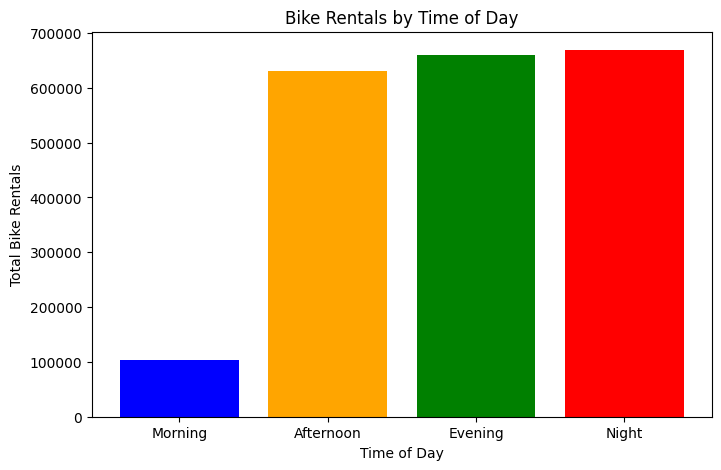

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Morning'
    elif 6 <= hour < 12:
        return 'Afternoon'
    elif 12 <= hour < 18:
        return 'Evening'
    else:
        return 'Night'

# Buat kolom baru untuk kategori waktu
hour_df['daypart'] = merged_df['hr'].apply(categorize_time)

# Hitung total penyewaan berdasarkan kategori waktu
daypart_counts = hour_df.groupby('daypart')['cnt'].sum().reset_index()

# Urutkan kategori waktu agar sesuai dengan urutan logis
daypart_counts['daypart'] = pd.Categorical(daypart_counts['daypart'], 
                                           categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                           ordered=True)
daypart_counts = daypart_counts.sort_values('daypart')

print(tabulate(daypart_counts, headers='keys', tablefmt='fancy_grid'))

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(daypart_counts['daypart'], daypart_counts['cnt'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Time of Day')
plt.ylabel('Total Bike Rentals')
plt.title('Bike Rentals by Time of Day')
plt.show()



**Insights:**
- Penyewaan sepeda cenderung lebih tinggi pada sore dan malam hari, kemungkinan karena waktu pulang kerja atau sekolah.
- Penyewaan lebih rendah pada pagi dan siang hari, mungkin karena banyak orang masih berada di tempat kerja atau sekolah.

## **Conclusion**

Berdasarkan analisis terhadap data penyewaan sepeda, ditemukan beberapa pola yang dapat menjadi wawasan bagi pengelola layanan penyewaan sepeda untuk mengoptimalkan layanan mereka. Berikut adalah beberapa kesimpulan utama:

**Pengaruh Musim terhadap Penyewaan**<br>
Penyewaan sepeda mengalami fluktuasi yang signifikan berdasarkan musim. Jumlah penyewaan cenderung lebih tinggi pada musim tertentu, seperti musim gugur, dibandingkan dengan musim semi. Hal ini menunjukkan bahwa faktor cuaca memiliki peran penting dalam keputusan pengguna untuk menyewa sepeda.

**Dampak Kondisi Cuaca**<br>
Cuaca yang cerah dan berawan mendukung peningkatan jumlah penyewaan sepeda. Sebaliknya, kondisi cuaca ekstrem seperti hujan lebat atau badai menyebabkan penurunan signifikan dalam penyewaan. Oleh karena itu, prediksi cuaca dapat digunakan untuk mengantisipasi permintaan sepeda.

**Hari Kerja vs. Akhir Pekan**<br>
Pada hari kerja, penyewaan sepeda cenderung lebih tinggi di pagi dan sore hari, mencerminkan pola perjalanan komuter. Sementara itu, pada akhir pekan, jumlah penyewaan meningkat secara merata sepanjang hari, mengindikasikan penggunaan rekreasi yang lebih dominan.

